Linear Regression Model 
that Predicts the prices of Diamonds

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data, and carrying out some EDA 

In [142]:
diamonds_data = pd.read_csv("diamonds.csv")
new_diamonds = pd.read_csv('new-diamonds.csv')
diamonds_data.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [143]:
new_diamonds.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6


In [144]:
diamonds_data.shape, new_diamonds.shape

((50000, 8), (3000, 7))

In [145]:
diamonds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   carat        50000 non-null  float64
 2   cut          50000 non-null  object 
 3   cut_ord      50000 non-null  int64  
 4   color        50000 non-null  object 
 5   clarity      50000 non-null  object 
 6   clarity_ord  50000 non-null  int64  
 7   price        50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


In [146]:
diamonds_data.drop(columns=['Unnamed: 0','cut_ord','clarity_ord'], axis=1, inplace = True)
new_diamonds.drop(columns=['Unnamed: 0','cut_ord','clarity_ord'], axis=1, inplace = True)

In [147]:
diamonds_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'price'], dtype='object')

at this stage we encode our categorical variables, thus transforming categorical variables to numerical variables, to train our model on

In [148]:
from sklearn import preprocessing

In [149]:
for x in diamonds_data.columns:
    if diamonds_data[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(diamonds_data[x].values))
        diamonds_data[x] = lbl.transform(list(diamonds_data[x].values))
for x in new_diamonds.columns:
    if new_diamonds[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(new_diamonds[x].values))
        new_diamonds[x] = lbl.transform(list(new_diamonds[x].values))        

In [150]:
diamonds_data.head()

,carat,cut,color,clarity,price
0,0.51,3,2,4,1749
1,2.25,0,3,0,7069
2,0.70,4,1,5,2757
3,0.47,1,2,4,1243
4,0.30,2,3,6,789


In [151]:
diamonds_data.describe()

,carat,cut,color,clarity,price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.798597,2.552260,2.598240,3.835380,3939.103500
std,0.474651,1.027876,1.702142,1.724268,3995.879832
min,0.200000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,2.000000,1.000000,2.000000,948.000000
50%,0.700000,2.000000,3.000000,4.000000,2402.500000
75%,1.040000,3.000000,4.000000,5.000000,5331.000000
max,5.010000,4.000000,6.000000,7.000000,18823.000000


At this point we quickly check for relationships among the variables, we achieve this by using a correlation matrix as a heatmap to find for possible correlations between our variables and the target variable.

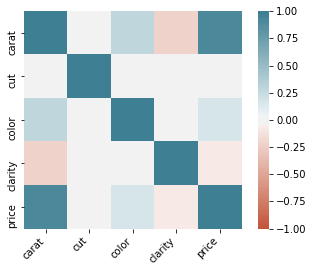

In [152]:
corr = diamonds_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

from the above heatmap, we can deduce that the carat is strongly correlated with the diamond price more than the other variables.

We move a step further by visualing the relationship between the diamond prices and 
the carat, we utilize the scatterplot for this. 

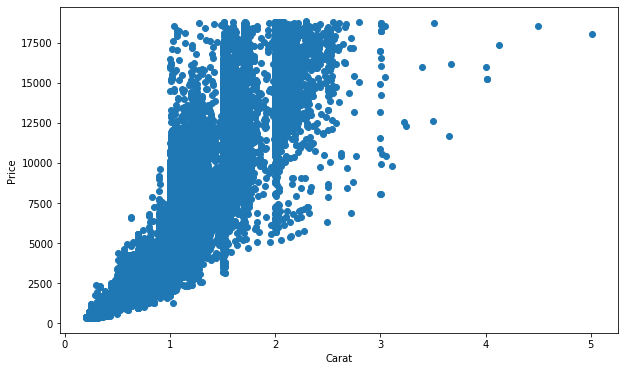

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
from seaborn import despine
import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = diamonds_data['carat'], y = diamonds_data['price'])
plt.ylabel("Price")
plt.xlabel("Carat")
plt.show()

from the scatterplot above, we see that the relationship between the carat and the diamond price is a linear relationship, and as such, we shall adopt a linear model.

In [154]:
y = diamonds_data['price']
diamonds_data.drop(columns=['price'], inplace=True)

we now scale and preprocess our data before training our model

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [156]:
scaler = MinMaxScaler()
x = scaler.fit_transform(diamonds_data)
TestingData = scaler.fit_transform(new_diamonds)

split data into training and test groups

In [157]:
X_train, X_val, y_train, y_val = train_test_split(x, y, random_state = 0)

we then fit and train our data 

In [102]:
from sklearn.linear_model import Ridge

In [103]:
linridg = Ridge(alpha=0.1) .fit(X_train,y_train)

In [104]:
print('Diamonds data set')
print('ridge regression linear model intercept: {}'
      .format(linridg.intercept_))
print('ridge regression linear model coeff:\n {}'
      .format(linridg.coef_))
print('r-squared score (trainng): {:.3f}'
      .format(linridg.score(X_train, y_train)))
print('r-squared score(test): {:.3f}'
      .format(linridg.score(X_val, y_val)))
print('Number of non-zero features: {}'
      .format(np.sum(linridg.coef_ !=0)))


Diamonds data set
ridge regression linear model intercept: -1712.031818967398
ridge regression linear model coeff:
 [39693.86072041   303.35945367 -1535.10558463  2154.86154978]
r-squared score (trainng): 0.877
r-squared score(test): 0.878
Number of non-zero features: 4


Now we have our model trained, and as we can see the model has an r-squared value of 0.877
on the training set and a score of 0.878 on the test data.
This goes to show that our model did perform pretty well, but the presence of negative predictions also implies that model made some wrong predictions too.

Now we fit our new diamond data set to our already trained model to make a prediction 

In [158]:
linridg = Ridge(alpha=0.1).fit(x,y)

In [159]:
print('New Diamonds Prediction Data set')
print('ridge regression linear model coeff:\n {}'
      .format(linridg.coef_))
print("New Diamonds predictions:\n{}".format(linridg.predict(TestingData)))

New Diamonds Prediction Data set
ridge regression linear model coeff:
 [39776.70623832   302.87757886 -1546.81716646  2182.67520627]
New Diamonds predictions:
[12695.01547689 10495.75595085  5945.51845873 ... 10355.72056428
  5080.75470563 10045.28476481]


In [160]:
t_df =linridg.predict(TestingData)

now, we append the new predicted diamond prices to the new diamond dataframe.

In [161]:
df2 = new_diamonds.assign(predicted_prices = t_df)
df2.head()

,carat,cut,color,clarity,predicted_prices
0,1.22,3,3,2,12695.015477
1,1.01,1,3,5,10495.755951
2,0.71,4,5,5,5945.518459
3,1.01,2,0,3,10721.262441
4,0.27,2,4,7,424.878752


Next we visualize the new prediction vs the carat, and we see that
that the our predicted prices on the new diamonds data set are in a much narrower range than actual prices from the main diamond dataset.we see here that the data points are less 
spread out.  This sortof reinforces the idea that there are likely other factors omitted from the modelthat would help improve our accuracy.  

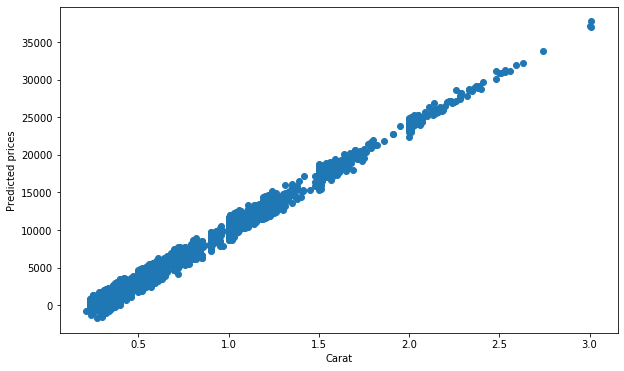

In [162]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df2['carat'], y = df2['predicted_prices'])
plt.ylabel("Predicted prices")
plt.xlabel("Carat")
plt.show()

 In Summary, the model is a good fit for the data, so basically  the model can give a good prediction on the average, but may predicted wrong for any particular diamond.